**Clustering of timeseries data using pretrained models - Air Quality Dataset**

** Loading the Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()
# Step 1: Loading the Dataset
# We start by loading the dataset to understand its structure and contents.

import pandas as pd

# Define the file path
file_path = 'AirQuality.csv'

# Load the dataset with the correct delimiter (semicolon)
air_quality_data = pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the dataframe to understand its structure
air_quality_data.head()

Saving AirQuality.csv to AirQuality (1).csv


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


**Data preparation steps**

In [ ]:
# Reloading the dataset to inspect the 'Date' and 'Time' columns
air_quality_data = pd.read_csv(file_path, delimiter=';')

# Replace commas in decimal places with periods for inspection
air_quality_data.replace(',', '.', regex=True, inplace=True)

# Inspecting the unique formats in the 'Date' and 'Time' columns
unique_dates = air_quality_data['Date'].unique()
unique_times = air_quality_data['Time'].unique()

unique_dates, unique_times

(array(['10/03/2004', '11/03/2004', '12/03/2004', '13/03/2004',
        '14/03/2004', '15/03/2004', '16/03/2004', '17/03/2004',
        '18/03/2004', '19/03/2004', '20/03/2004', '21/03/2004',
        '22/03/2004', '23/03/2004', '24/03/2004', '25/03/2004',
        '26/03/2004', '27/03/2004', '28/03/2004', '29/03/2004',
        '30/03/2004', '31/03/2004', '01/04/2004', '02/04/2004',
        '03/04/2004', '04/04/2004', '05/04/2004', '06/04/2004',
        '07/04/2004', '08/04/2004', '09/04/2004', '10/04/2004',
        '11/04/2004', '12/04/2004', '13/04/2004', '14/04/2004',
        '15/04/2004', '16/04/2004', '17/04/2004', '18/04/2004',
        '19/04/2004', '20/04/2004', '21/04/2004', '22/04/2004',
        '23/04/2004', '24/04/2004', '25/04/2004', '26/04/2004',
        '27/04/2004', '28/04/2004', '29/04/2004', '30/04/2004',
        '01/05/2004', '02/05/2004', '03/05/2004', '04/05/2004',
        '05/05/2004', '06/05/2004', '07/05/2004', '08/05/2004',
        '09/05/2004', '10/05/2004', '11/

**Combine and convert 'Date' and 'Time' into a datetime column with the specified format**

In [ ]:
# Correcting the datetime conversion with the identified format and handling NaN values
# First, we fill NaN values in 'Date' and 'Time' columns with a placeholder value to avoid errors during conversion
air_quality_data['Date'].fillna('01/01/1900', inplace=True)
air_quality_data['Time'].fillna('00.00.00', inplace=True)

# Then, we convert the 'Date' and 'Time' columns into a single datetime column
date_format = '%d/%m/%Y %H.%M.%S'
air_quality_data['DateTime'] = pd.to_datetime(air_quality_data['Date'] + ' ' + air_quality_data['Time'], format=date_format)

# Setting the 'DateTime' column as the index
air_quality_data.set_index('DateTime', inplace=True)

# Dropping the original 'Date' and 'Time' columns
air_quality_data.drop(['Date', 'Time'], axis=1, inplace=True)

# Converting numerical columns to float
num_cols = air_quality_data.columns.drop(['CO(GT)', 'NMHC(GT)'])  # Excluding non-numeric columns for now
air_quality_data[num_cols] = air_quality_data[num_cols].apply(pd.to_numeric, errors='coerce')

# Checking the first few rows after correcting the datetime format and other data preparation steps
air_quality_data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
DateTime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
2004-03-10 19:00:00,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


**Exploratory Data Analysis (EDA)**

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)

# Descriptive statistics to summarize the dataset's distribution
descriptive_stats = air_quality_data.describe()

# Checking for missing data
missing_data = air_quality_data.isnull().sum()

descriptive_stats, missing_data

(       PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
 count  9357.000000  9357.000000  9357.000000    9357.000000  9357.000000   
 mean   1048.990061  -159.090093     1.865683     894.595276   168.616971   
 std     329.832710   139.789093    41.380206     342.333252   257.433866   
 min    -200.000000  -200.000000  -200.000000    -200.000000  -200.000000   
 25%     921.000000  -200.000000     4.000000     711.000000    50.000000   
 50%    1053.000000  -200.000000     7.900000     895.000000   141.000000   
 75%    1221.000000  -200.000000    13.600000    1105.000000   284.000000   
 max    2040.000000  1189.000000    63.700000    2214.000000  1479.000000   
 
        PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
 count   9357.000000  9357.000000   9357.000000  9357.000000  9357.000000   
 mean     794.990168    58.148873   1391.479641   975.072032     9.778305   
 std      321.993552   126.940455    467.210125   456.938184    43.203623 

**Visualize the dataset and analyze the updated missing data information**

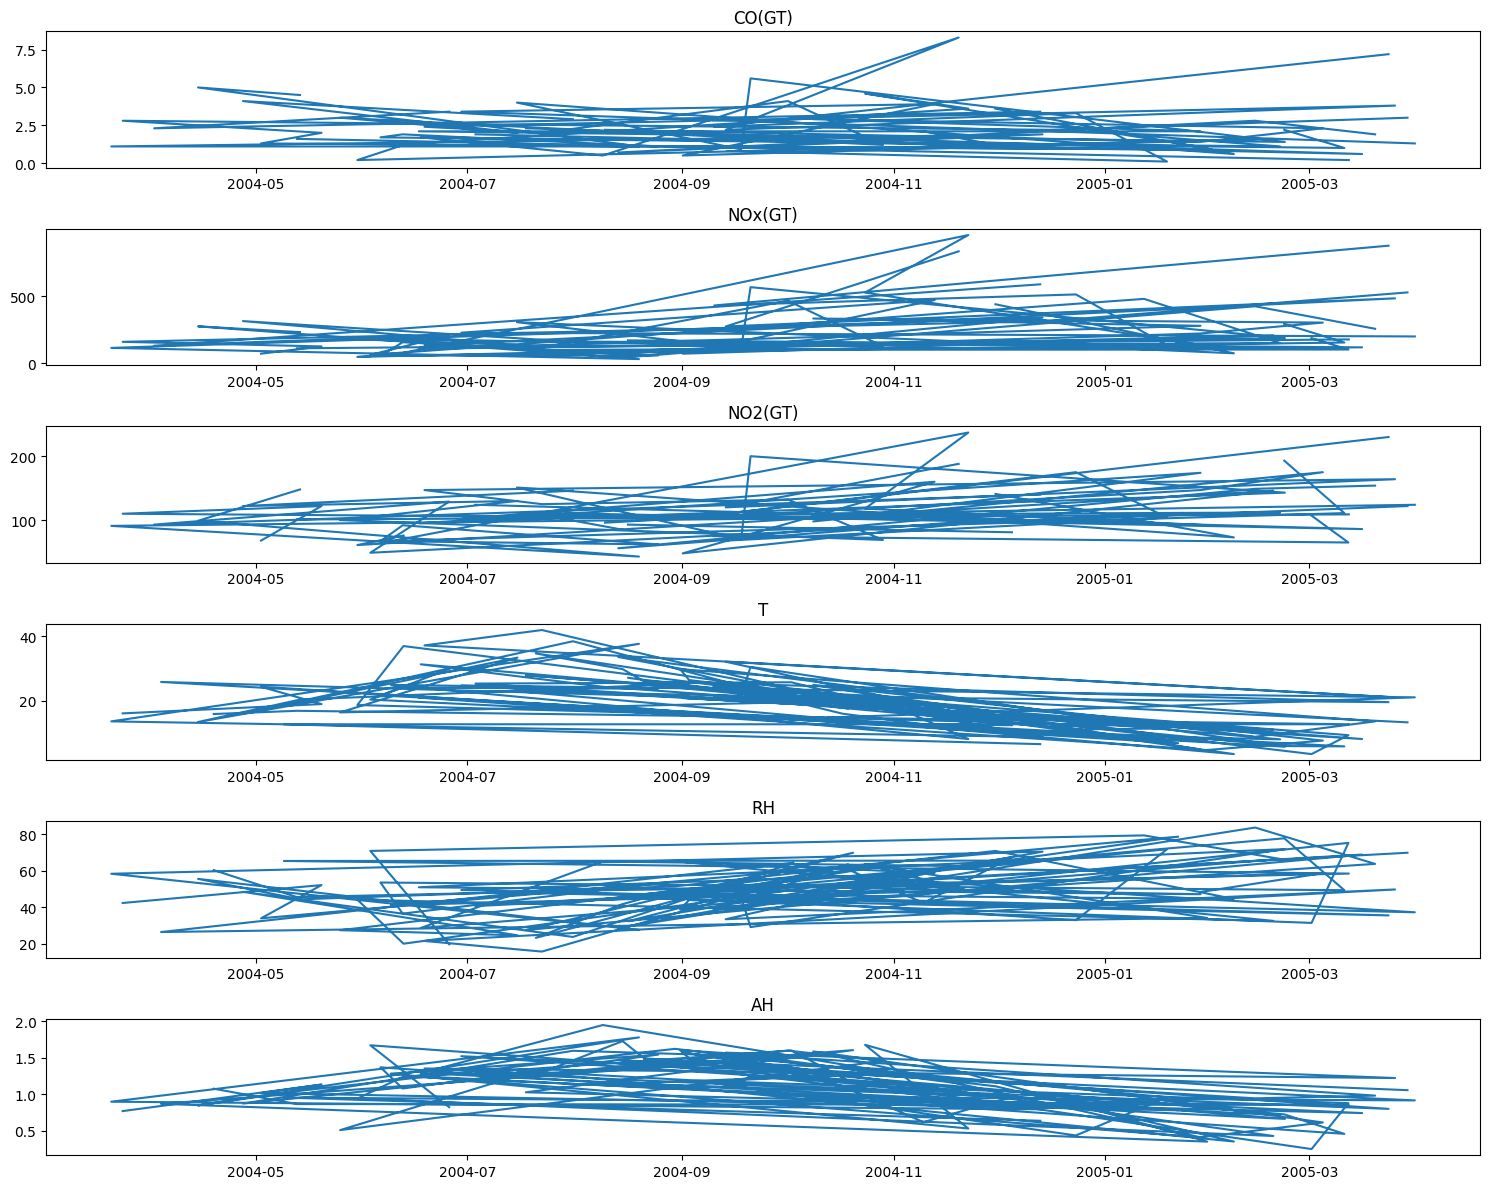

In [ ]:
# Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

air_quality_data = pd.read_csv(file_path, delimiter=';')

# Data Preparation
air_quality_data.replace(',', '.', regex=True, inplace=True)
air_quality_data['DateTime'] = pd.to_datetime(air_quality_data['Date'] + ' ' + air_quality_data['Time'], format='%d/%m/%Y %H.%M.%S')
air_quality_data.set_index('DateTime', inplace=True)
air_quality_data.drop(['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)
air_quality_data = air_quality_data.apply(pd.to_numeric, errors='coerce')
air_quality_data[air_quality_data < 0] = pd.NA

# Sampling a smaller subset for visualization
sampled_air_quality_data = air_quality_data.sample(frac=0.01, random_state=1)  # Sampling 1% of the data

# Selecting columns for visualization
columns_to_visualize = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']

# Visualization
plt.figure(figsize=(15, 12))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(len(columns_to_visualize), 1, i)
    plt.plot(sampled_air_quality_data.index, sampled_air_quality_data[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handling Missing Data
# Removing the column 'NMHC(GT)' due to a large amount of missing data
air_quality_data.drop('NMHC(GT)', axis=1, inplace=True)

# Imputing missing values in other columns with the median value
imputer = SimpleImputer(strategy='median')
air_quality_data_imputed = pd.DataFrame(imputer.fit_transform(air_quality_data), columns=air_quality_data.columns)

# Data Normalization
# Standardizing the data
scaler = StandardScaler()
air_quality_data_normalized = pd.DataFrame(scaler.fit_transform(air_quality_data_imputed), columns=air_quality_data_imputed.columns)

# Checking the first few rows of the normalized data
air_quality_data_normalized.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.390909,1.238051,0.263047,0.416744,-0.353175,0.886960,0.015276,0.697869,0.638760,-0.550010,-0.020907,-0.676535
1,-0.065245,0.916766,-0.080835,0.066813,-0.677924,1.358404,-0.465466,0.303566,-0.123232,-0.584989,-0.092033,-0.758623
2,0.086806,1.436492,-0.135857,0.005287,-0.533591,1.222564,0.038169,0.291707,0.139347,-0.748227,0.281375,-0.695850
3,0.086806,1.313647,-0.108346,0.039895,-0.322247,1.030790,0.221309,0.377683,0.471431,-0.853165,0.637002,-0.603088
4,-0.369348,0.822270,-0.479739,-0.390789,-0.533591,1.482258,0.083954,0.099003,0.232021,-0.829846,0.613294,-0.597751


**Handling the missing data and preparing the dataset for clustering analysis**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

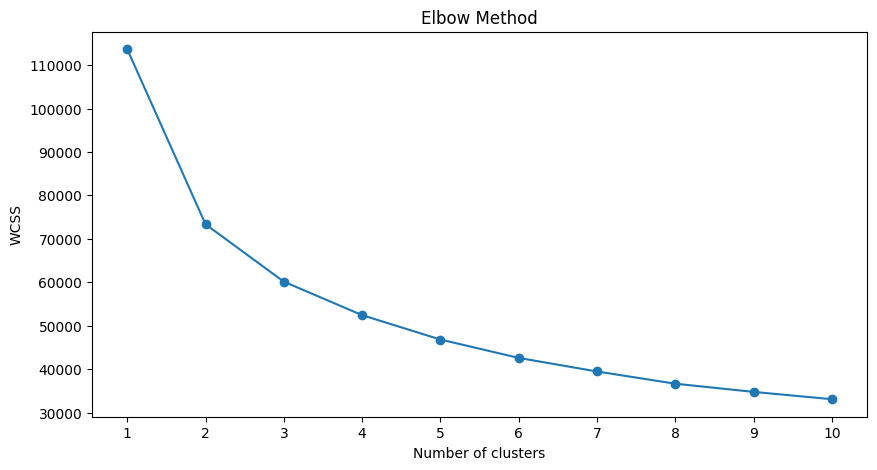

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Selecting a reasonable number of clusters for K-means
# We will use the Elbow Method to find an optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(air_quality_data_normalized)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.show()

# Based on the Elbow Method, we will choose an appropriate number of clusters for further analysis.

In [ ]:
# Assuming you've chosen an optimal number of clusters, for example, 'n_clusters_optimal'
n_clusters_optimal = 5  # Replace with your determined optimal number

# Fitting the K-means model
kmeans = KMeans(n_clusters=n_clusters_optimal, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(air_quality_data_normalized)

# Adding the cluster labels to the original data
air_quality_data['Cluster'] = cluster_labels

# Analyzing the clusters
# You can start by examining the centroid of each cluster or the distribution of data points in each cluster.
# For instance:
cluster_summary = air_quality_data.groupby('Cluster').mean()
print(cluster_summary)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


           CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)     NOx(GT)  \
Cluster                                                                
0        0.869607   888.547830   2.937327     637.338264  107.204144   
1        1.379753  1003.285971   7.174202     854.727664  109.095086   
2        3.013503  1276.836217  17.047463    1204.452134  248.794649   
3        4.923112  1496.662037  23.905440    1390.141204  660.448630   
4        2.301535  1130.112167   9.183270     937.692015  350.123457   

         PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)          T  \
Cluster                                                                   
0         1153.150888   75.742840   1098.792406   628.711045  11.879980   
1          877.892357   80.821038   1512.625762   830.830283  24.525440   
2          659.512111  126.362518   1828.264129  1317.387543  24.685006   
3          506.875000  175.591324   1806.282407  1757.023148  14.909606   
4          725.673638  149.550000   1215.7148

**Visualization after clustering**

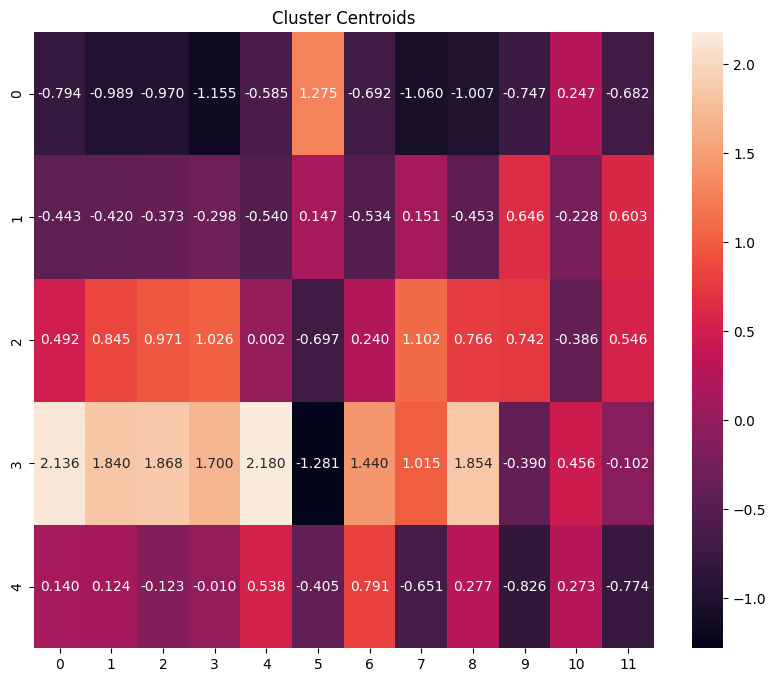

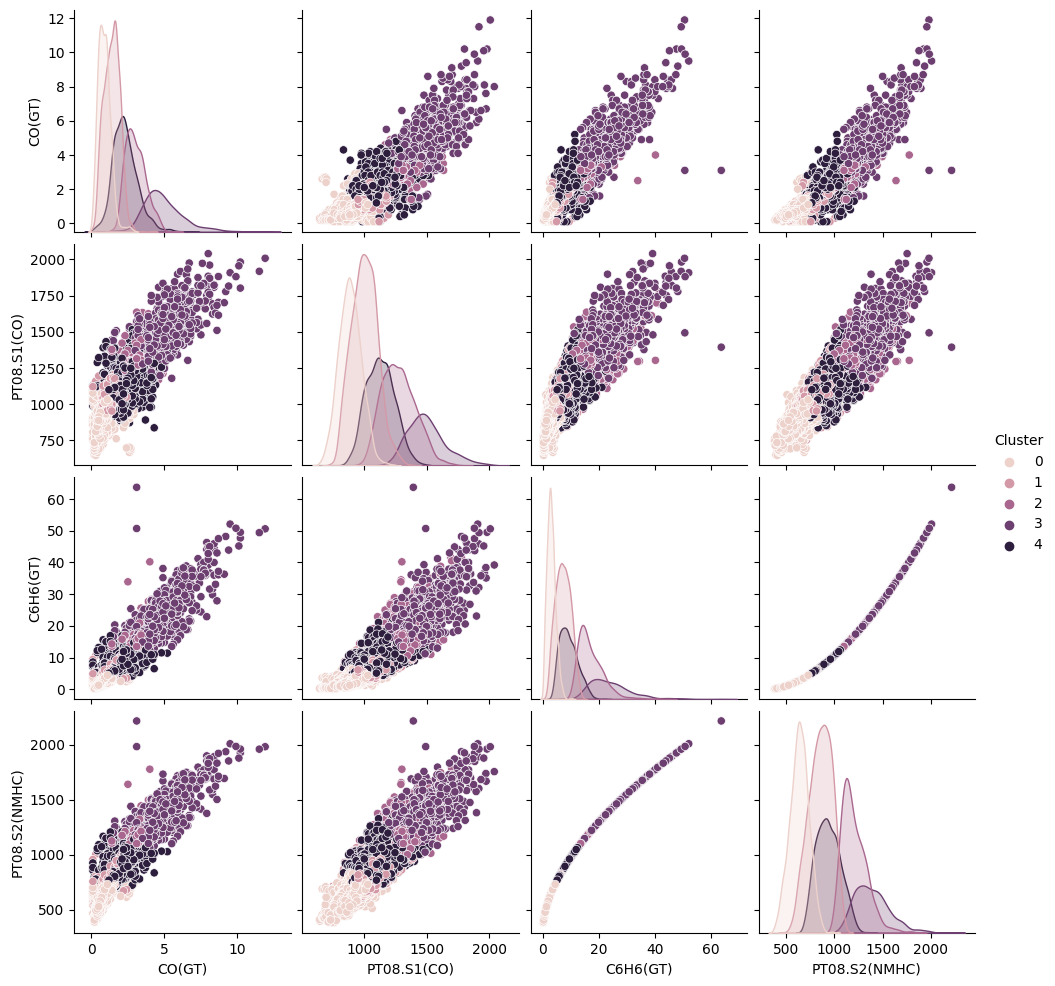

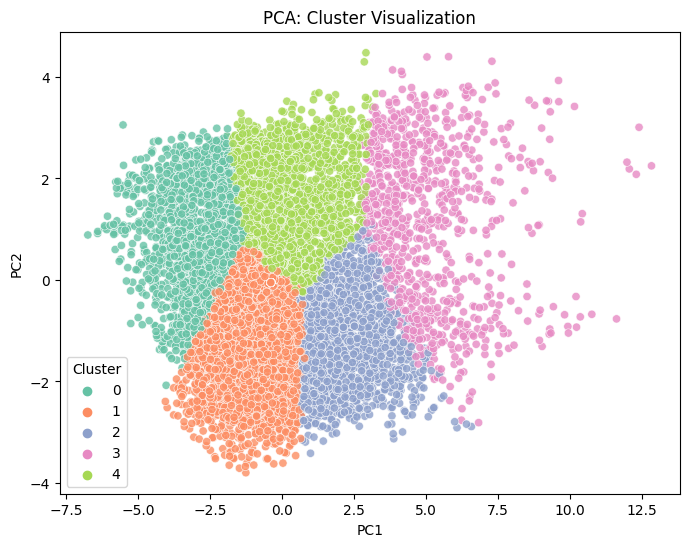

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already normalized your data and it's stored in air_quality_data_normalized
# And assuming kmeans has already been fitted with your data

# Add the cluster labels to your original DataFrame
air_quality_data['Cluster'] = kmeans.labels_

# 1. Cluster Centroids Visualization
centroids = kmeans.cluster_centers_
plt.figure(figsize=(10, 8))
sns.heatmap(centroids, annot=True, fmt=".3f")
plt.title('Cluster Centroids')
plt.show()

# 2. Pair Plot (Adjust the selected_columns list based on your dataset)
selected_columns = air_quality_data.columns[:4].tolist()  # Example: selecting first four columns
columns_for_pair_plot = selected_columns + ['Cluster']
sns.pairplot(air_quality_data[columns_for_pair_plot], hue='Cluster')
plt.show()

# 3. PCA for Dimensionality Reduction and Visualization
pca = PCA(n_components=2)  # Reducing to 2 dimensions
reduced_data = pca.fit_transform(air_quality_data_normalized)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['Cluster'] = kmeans.labels_

# Scatter plot of the two principal components colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=reduced_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', alpha=0.8)
plt.title('PCA: Cluster Visualization')
plt.show()